In [54]:
# Importing required python libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import keras 
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Dropout, Flatten
import cv2
#import cv2bb

In [56]:
# Obtaining Training Dataset from Local Directory

train_data = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/yash2/OneDrive/Desktop/IIIT Class/Hackathons/SIH 2022/SIH2022-Finals-Vigrah-main/SIH_Char"
    , labels = 'inferred'
    , label_mode = 'int'
    , image_size=(224, 224)
    , color_mode = 'rgb'
    , shuffle = True
    , seed = 101
    , validation_split = 0.3
    , subset = "training"   
)

Found 226955 files belonging to 214 classes.
Using 158869 files for training.


In [57]:
# Obtaining Validation Dataset from Local Directory

val_data = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/yash2/OneDrive/Desktop/IIIT Class/Hackathons/SIH 2022/SIH2022-Finals-Vigrah-main/SIH_Char"
    , labels = 'inferred'
    , label_mode = 'int'
    , image_size=(224, 224)
    , color_mode = 'rgb'
    , shuffle = True
    , seed = 101
    , validation_split = 0.3
    , subset = "validation"   
)

Found 226955 files belonging to 214 classes.
Using 68086 files for validation.


In [58]:
# Obtaining Class Names

class_names = train_data.class_names
class_names

['a',
 'ba',
 'be',
 'bha',
 'bhe',
 'bhi',
 'bho',
 'bhu',
 'bhā',
 'bhī',
 'bhū',
 'bi',
 'bo',
 'bu',
 'bā',
 'ca',
 'ce',
 'cha',
 'che',
 'chi',
 'chu',
 'chā',
 'ci',
 'co',
 'cu',
 'cā',
 'cū',
 'da',
 'de',
 'dha',
 'dhe',
 'dhi',
 'dho',
 'dhu',
 'dhā',
 'dhī',
 'dhū',
 'di',
 'do',
 'du',
 'dā',
 'dī',
 'e',
 'ga',
 'ge',
 'gha',
 'ghe',
 'gho',
 'ghu',
 'ghā',
 'gi',
 'go',
 'gu',
 'gā',
 'ha',
 'he',
 'hi',
 'ho',
 'hu',
 'hā',
 'hī',
 'hū',
 'i',
 'ja',
 'je',
 'jha',
 'jhi',
 'jhā',
 'ji',
 'jo',
 'ju',
 'jā',
 'jī',
 'jū',
 'ka',
 'ke',
 'kha',
 'khe',
 'khi',
 'kho',
 'khu',
 'khā',
 'khī',
 'ki',
 'ko',
 'ku',
 'kā',
 'kī',
 'kū',
 'la',
 'le',
 'li',
 'lo',
 'lu',
 'lā',
 'lī',
 'lū',
 'ma',
 'me',
 'mi',
 'mo',
 'mu',
 'mā',
 'mī',
 'mū',
 'na',
 'ne',
 'ni',
 'no',
 'nu',
 'nā',
 'nī',
 'nū',
 'o',
 'pa',
 'pe',
 'pha',
 'phe',
 'phā',
 'pi',
 'po',
 'pu',
 'pā',
 'pī',
 'ra',
 're',
 'ri',
 'ro',
 'ru',
 'rā',
 'rī',
 'rū',
 'sa',
 'se',
 'si',
 'so',
 'su',
 'sā',

In [69]:
import matplotlib.pylab as plt
import tensorflow as tf
from keras.models import Sequential

vgg16 = Sequential()
vgg16.add(Conv2D(filters = 6, kernel_size = 7, strides = 2, activation = 'sigmoid', input_shape = (224,224,3)))
vgg16.add(MaxPooling2D(pool_size = 3, strides = 2))
vgg16.add(Conv2D(filters = 16, kernel_size = 3, strides = 2, activation = 'sigmoid', input_shape = (112,112,64)))
vgg16.add(MaxPooling2D(pool_size = 3, strides = 2))
vgg16.add(Flatten())
vgg16.add(Dense(units = 128, activation = 'elu'))
vgg16.add(Dense(214,activation = 'softmax'))

vgg16.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 109, 109, 6)       888       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 16)        880       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_14 (Flatten)        (None, 2304)              0         
                                                                 
 dense_35 (Dense)            (None, 128)             

In [70]:
vgg16.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [71]:
epochs= 50
callback = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
history = vgg16.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  verbose = 1,
  callbacks = [callback]
)

Epoch 1/50
4965/4965 [==============================] - 1038s 209ms/step - loss: 3.6482 - accuracy: 0.1913 - val_loss: 2.4190 - val_accuracy: 0.3747
Epoch 2/50
4965/4965 [==============================] - 1068s 215ms/step - loss: 2.0693 - accuracy: 0.4553 - val_loss: 1.8853 - val_accuracy: 0.4934
Epoch 3/50
4965/4965 [==============================] - 1161s 234ms/step - loss: 1.6674 - accuracy: 0.5434 - val_loss: 1.6596 - val_accuracy: 0.5433
Epoch 4/50
4965/4965 [==============================] - 907s 182ms/step - loss: 1.5380 - accuracy: 0.5758 - val_loss: 1.5347 - val_accuracy: 0.5814
Epoch 5/50
4965/4965 [==============================] - 879s 177ms/step - loss: 1.5633 - accuracy: 0.5734 - val_loss: 1.5362 - val_accuracy: 0.5787
Epoch 6/50
4965/4965 [==============================] - 934s 188ms/step - loss: 1.4443 - accuracy: 0.5979 - val_loss: 1.5221 - val_accuracy: 0.5872
Epoch 7/50
4965/4965 [==============================] - 886s 178ms/step - loss: 1.3867 - accuracy: 0.6141 - v

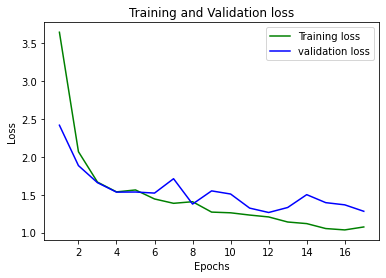

In [74]:
# Plotting of Validation and Training Loss

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,18)   # ======== Adjust this! ==========
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

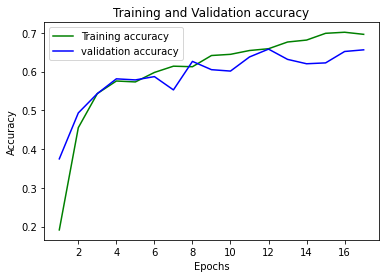

In [76]:
# Plotting of Validation and Training Accuracy 

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,18)   # ========== Adjust This! ==========
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
model_json = vgg16.to_json()
with open("vgg16_model_arch.json", "w") as json_file:
    json_file.write(model_json)
    
vgg16.save_weights("vgg16_model_weights.h5")

In [78]:
from keras.models import model_from_json
model = model_from_json(open('vgg16_model_arch.json').read())

model.load_weights('vgg16_model_weights.h5')